### simple coding pracyticle


### Data Transformation using exponential Kernels

In [1]:
import numpy as np

# Define the Exponential Kernel function
def exponential_kernel(X, alpha=1.0):
    """
    Compute the exponential kernel transformation for a dataset.
    
    X: Input data matrix of shape (n_samples, n_features)
    alpha: Scaling parameter
    
    Returns:
    Transformed kernel matrix of shape (n_samples, n_samples)
    """
    return np.exp(alpha * np.dot(X, X.T))  # Computing the kernel matrix

# Step 1: Generate synthetic data (5 samples, 3 features)
np.random.seed(42)  # For reproducibility
X = np.random.rand(5, 3)  # 5 points in 3D space

# Step 2: Compute the Exponential Kernel transformation
K_transformed = exponential_kernel(X, alpha=0.5)

# Print the transformed data
print("Original Data:\n", X)
print("\nExponential Kernel Transformed Data:\n", K_transformed)


Original Data:
 [[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]
 [0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497]]

Exponential Kernel Transformed Data:
 [[2.20334478 1.27553909 1.90146877 1.64439058 1.38178465]
 [1.27553909 1.22572689 1.14092719 1.33536267 1.3230249 ]
 [1.90146877 1.14092719 1.74627865 1.37849495 1.18623691]
 [1.64439058 1.33536267 1.37849495 2.05701892 1.46972787]
 [1.38178465 1.3230249  1.18623691 1.46972787 1.47042942]]


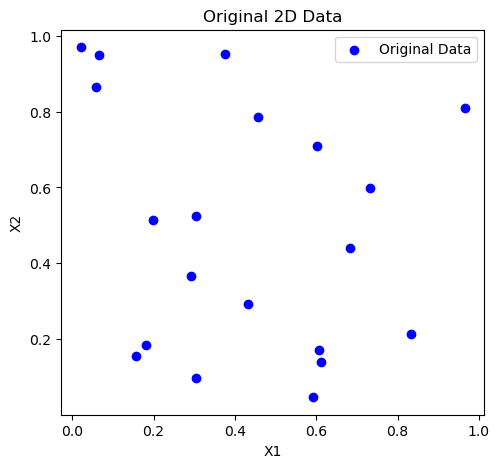

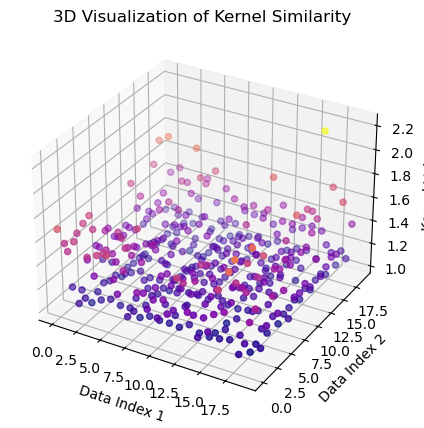

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Exponential Kernel function
def exponential_kernel(X, alpha=1.0):
    """Compute the Exponential Kernel transformation."""
    return np.exp(alpha * np.dot(X, X.T))

# Step 1: Generate 2D synthetic data
np.random.seed(42)
X = np.random.rand(20, 2)  # 20 points in 2D space

# Step 2: Compute the Exponential Kernel transformation
K_transformed = exponential_kernel(X, alpha=0.5)

# Step 3: Plot the original 2D data
plt.figure(figsize=(12, 5))

# Original 2D Data Plot
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o', label="Original Data")
plt.title("Original 2D Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

# Step 4: 3D Scatter Plot of Kernel Values (Showing similarity)
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

# Extract indices and corresponding kernel values
i_idx, j_idx = np.meshgrid(range(K_transformed.shape[0]), range(K_transformed.shape[1]), indexing='ij')
ax.scatter(i_idx, j_idx, K_transformed, c=K_transformed, cmap='plasma')

ax.set_xlabel("Data Index 1")
ax.set_ylabel("Data Index 2")
ax.set_zlabel("Kernel Value")
ax.set_title("3D Visualization of Kernel Similarity")

plt.show()


## kernal ridge regression

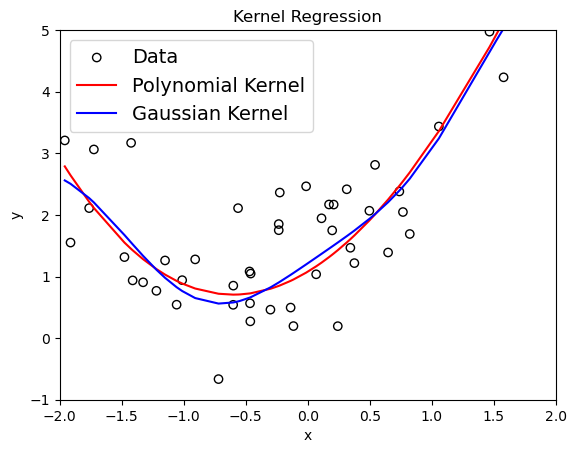

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def k_p(x, y):  # Polynomial Kernel Definition
    return (np.dot(x, y) + 1) ** 3

def k_g(x, y):  # Gaussian Kernel Definition
    return np.exp(-((x - y) ** 2) / 2)

def alpha(k, x, y, lam=0.1):
    """Compute alpha coefficients for kernel ridge regression."""
    n = len(x)
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = k(x[i], x[j])
    return np.linalg.inv(K + lam * np.identity(n)).dot(y)

# Data Generation
np.random.seed(42)
n = 50
x = np.random.randn(n)
y = 1 + x + x**2 + np.random.randn(n)

# Compute alpha values for both kernels
alpha_p = alpha(k_p, x, y)
alpha_g = alpha(k_g, x, y)

# Compute kernel regression estimates
z = np.sort(x)
u = []
v = []
for j in range(n):
    S_p, S_g = 0, 0
    for i in range(n):
        S_p += alpha_p[i] * k_p(x[i], z[j])
        S_g += alpha_g[i] * k_g(x[i], z[j])
    u.append(S_p)
    v.append(S_g)

# Plot results
plt.scatter(x, y, facecolors='none', edgecolors='k', marker='o', label="Data")
plt.plot(z, u, c="r", label="Polynomial Kernel")
plt.plot(z, v, c="b", label="Gaussian Kernel")
plt.xlim(-2, 2)
plt.ylim(-1, 5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend(loc="upper left", frameon=True, prop={'size': 14})
plt.show()


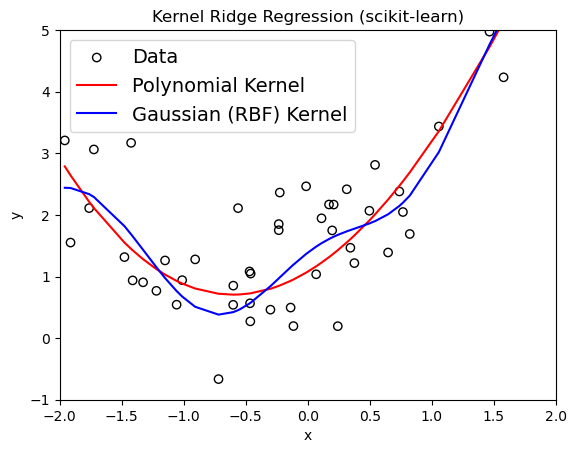

In [3]:
from sklearn.kernel_ridge import KernelRidge
import numpy as np
import matplotlib.pyplot as plt

# Data Generation
np.random.seed(42)
n = 50
x = np.random.randn(n).reshape(-1, 1)  # Reshape for sklearn
y = 1 + x.ravel() + x.ravel()**2 + np.random.randn(n)

# Define models with Polynomial and Gaussian (RBF) kernels
krr_poly = KernelRidge(alpha=0.1, kernel="poly", degree=3)
krr_rbf = KernelRidge(alpha=0.1, kernel="rbf")

# Fit models
krr_poly.fit(x, y)
krr_rbf.fit(x, y)

# Predict on sorted inputs
z = np.sort(x, axis=0)
y_poly = krr_poly.predict(z)
y_rbf = krr_rbf.predict(z)

# Plot results
plt.scatter(x, y, facecolors='none', edgecolors='k', marker='o', label="Data")
plt.plot(z, y_poly, c="r", label="Polynomial Kernel")
plt.plot(z, y_rbf, c="b", label="Gaussian (RBF) Kernel")
plt.xlim(-2, 2)
plt.ylim(-1, 5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Ridge Regression (scikit-learn)")
plt.legend(loc="upper left", frameon=True, prop={'size': 14})
plt.show()


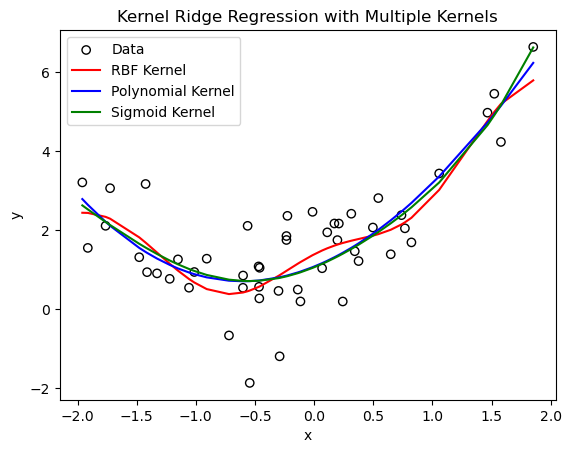

In [7]:
import numpy as np

class KernelRidgeRegression:
    def __init__(self, kernel='rbf', lam=0.1, degree=3, gamma=None, coef0=1):
        self.kernel = kernel
        self.lam = lam
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0
        self.alpha = None
        self.X_train = None
    
    def _compute_kernel(self, X1, X2):
        """Compute the kernel matrix."""
        if self.kernel == 'linear':
            return X1 @ X2.T
        elif self.kernel == 'poly':
            return (X1 @ X2.T + self.coef0) ** self.degree
        elif self.kernel == 'rbf':
            if self.gamma is None:
                self.gamma = 1 / X1.shape[1]  # Default gamma
            pairwise_sq_dists = np.sum(X1**2, axis=1)[:, np.newaxis] + np.sum(X2**2, axis=1) - 2 * (X1 @ X2.T)
            return np.exp(-self.gamma * pairwise_sq_dists)
        elif self.kernel == 'sigmoid':
            return np.tanh(self.gamma * (X1 @ X2.T) + self.coef0)
        elif self.kernel == 'laplacian':
            pairwise_abs_dists = np.abs(X1[:, np.newaxis] - X2).sum(axis=2)
            return np.exp(-self.gamma * pairwise_abs_dists)
        else:
            raise ValueError("Unsupported kernel. Choose from 'linear', 'poly', 'rbf', 'sigmoid', 'laplacian'.")
    
    def fit(self, X, y):
        """Fit the KRR model."""
        self.X_train = X
        K = self._compute_kernel(X, X)
        self.alpha = np.linalg.inv(K + self.lam * np.eye(len(X))) @ y
    
    def predict(self, X):
        """Predict using the trained model."""
        K_test = self._compute_kernel(X, self.X_train)
        return K_test @ self.alpha

# Example Usage
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    
    # Generate Data
    np.random.seed(42)
    n = 50
    X = np.random.randn(n, 1)
    y = 1 + X.ravel() + X.ravel()**2 + np.random.randn(n)
    
    # Train Kernel Ridge Regression Model with multiple kernels
    krr_rbf = KernelRidgeRegression(kernel='rbf', lam=0.1)
    krr_poly = KernelRidgeRegression(kernel='poly', lam=0.1, degree=3)
    krr_sigmoid = KernelRidgeRegression(kernel='sigmoid', lam=0.1, gamma=0.5, coef0=1)
    
    krr_rbf.fit(X, y)
    krr_poly.fit(X, y)
    krr_sigmoid.fit(X, y)
    
    # Predict
    X_test = np.sort(X, axis=0)
    y_pred_rbf = krr_rbf.predict(X_test)
    y_pred_poly = krr_poly.predict(X_test)
    y_pred_sigmoid = krr_sigmoid.predict(X_test)
    
    # Plot Results
    plt.scatter(X, y, facecolors='none', edgecolors='k', marker='o', label="Data")
    plt.plot(X_test, y_pred_rbf, c="r", label="RBF Kernel")
    plt.plot(X_test, y_pred_poly, c="b", label="Polynomial Kernel")
    plt.plot(X_test, y_pred_sigmoid, c="g", label="Sigmoid Kernel")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Kernel Ridge Regression with Multiple Kernels")
    plt.legend()
    plt.show()

### Kerenel K-means Algorithm

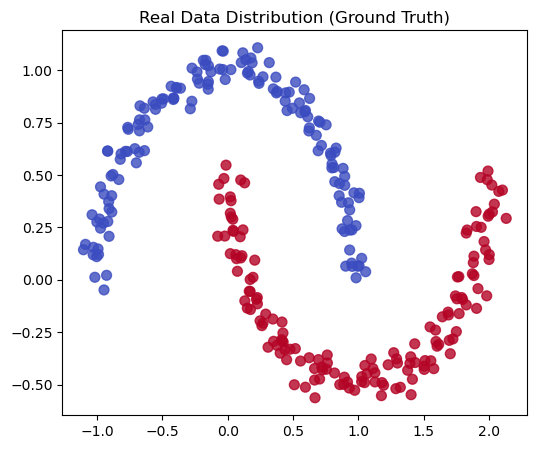

Confusion Matrix:
[[113  37]
 [ 38 112]]
True Positives (TP): 112
True Negatives (TN): 113
False Positives (FP): 37
False Negatives (FN): 38


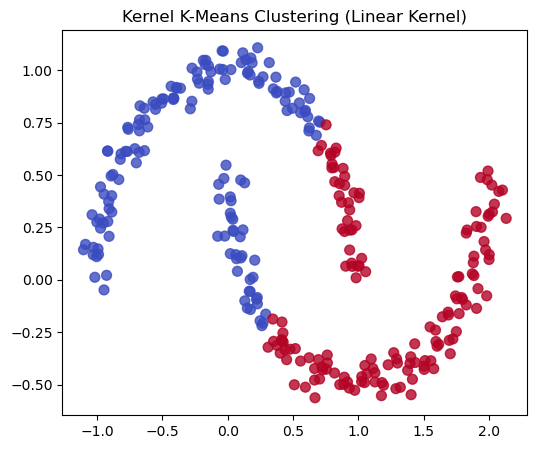

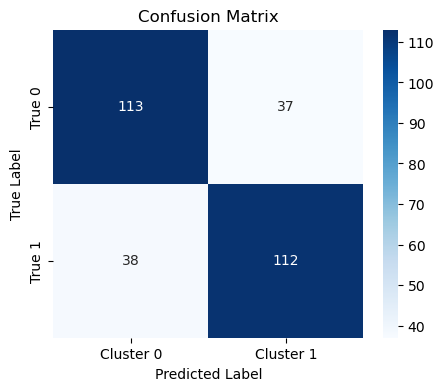

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_kernels, confusion_matrix, accuracy_score
from sklearn.datasets import make_moons

class KernelKMeans:
    def __init__(self, n_clusters=2, kernel="rbf", max_iter=100, tol=1e-4, gamma=1.0, degree=3, coef0=1):
        self.n_clusters = n_clusters
        self.kernel = kernel
        self.max_iter = max_iter
        self.tol = tol
        self.gamma = gamma
        self.degree = degree
        self.coef0 = coef0

    def _get_kernel_params(self):
        """ Returns only the valid parameters for the chosen kernel """
        params = {}
        if self.kernel in ["rbf", "laplacian"]:
            params["gamma"] = self.gamma
        elif self.kernel in ["poly"]:
            params["gamma"] = self.gamma
            params["degree"] = self.degree
            params["coef0"] = self.coef0
        elif self.kernel in ["sigmoid"]:
            params["gamma"] = self.gamma
            params["coef0"] = self.coef0
        return params

    def fit(self, X):
        """ Fit the Kernel K-Means model """
        n_samples = X.shape[0]
        self.labels_ = np.random.randint(self.n_clusters, size=n_samples)

        # Compute the kernel matrix
        K = pairwise_kernels(X, metric=self.kernel, **self._get_kernel_params())

        for _ in range(self.max_iter):
            # Compute cluster assignment
            dist_matrix = np.zeros((n_samples, self.n_clusters))

            for k in range(self.n_clusters):
                cluster_mask = (self.labels_ == k)
                if np.sum(cluster_mask) == 0:
                    continue
                K_cluster = K[:, cluster_mask]
                dist_matrix[:, k] = np.diag(K) - 2 * np.sum(K_cluster, axis=1) / np.sum(cluster_mask) + \
                                    np.sum(K_cluster) / (np.sum(cluster_mask) ** 2)

            new_labels = np.argmin(dist_matrix, axis=1)

            # Check for convergence
            if np.linalg.norm(new_labels - self.labels_) < self.tol:
                break
            self.labels_ = new_labels

    def predict(self, X):
        """ Predict cluster assignments for new data """
        return self.labels_

# ---- Generate Synthetic Data ----
X, y_true = make_moons(n_samples=300, noise=0.05, random_state=42)

# ---- Plot Real Data ----
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap="coolwarm", s=50, alpha=0.8)
plt.title("Real Data Distribution (Ground Truth)")
plt.show()

# ---- Run Kernel K-Means ----
kernel_kmeans = KernelKMeans(n_clusters=2, kernel="linear", gamma=0.1)
kernel_kmeans.fit(X)
y_pred = kernel_kmeans.predict(X)

# ---- Compute Confusion Matrix ----
conf_matrix = confusion_matrix(y_true, y_pred)

# ---- Compute TP, TN, FP, FN ----
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# ---- Print Confusion Matrix and Metrics ----
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# ---- Plot Clustering Results ----
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="coolwarm", s=50, alpha=0.8)
plt.title("Kernel K-Means Clustering (Linear Kernel)")
plt.show()

# ---- Plot Confusion Matrix ----
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Cluster 0", "Cluster 1"], yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


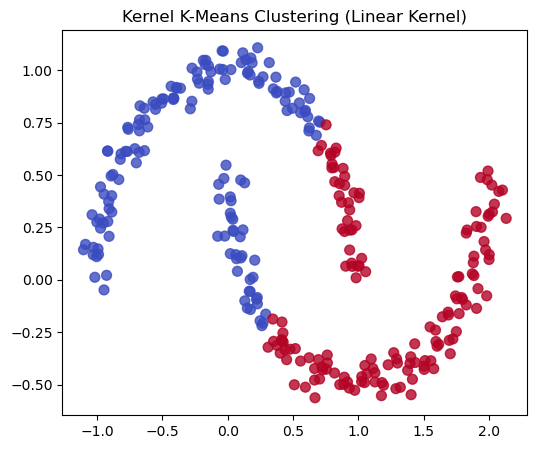

,Feature_1,Feature_2,Label
0,0.622519,-0.372101,1
1,1.904269,-0.136303,1
2,-0.069431,0.456117,1
3,0.933899,0.237483,0
4,1.180360,-0.490847,1


In [72]:
import pandas as pd
from sklearn.datasets import make_moons

# Generate Two-Moons dataset
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Create DataFrame
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])  # Assign column names
df['Label'] = y  # Add labels to the dataset

# ---- Plot Clustering Results ----
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="coolwarm", s=50, alpha=0.8)
plt.title("Kernel K-Means Clustering (Linear Kernel)")
plt.show()
df.head(5)

## kerenel k -menas spectral relexation 

c:\Users\jarif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


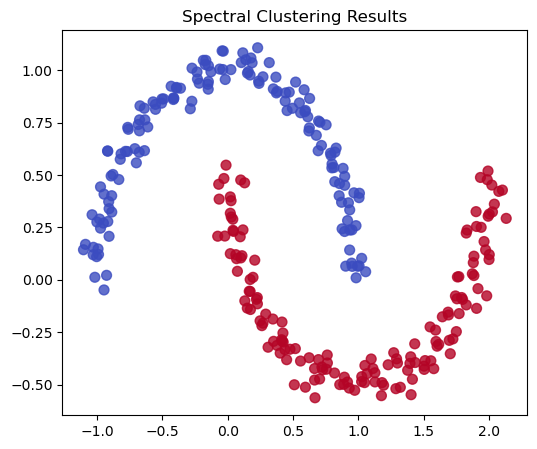

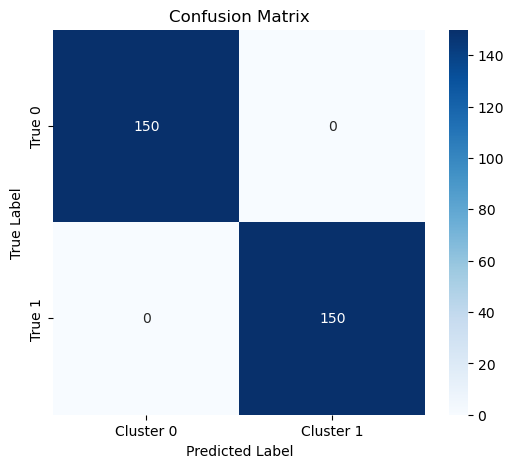

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.spatial.distance import cdist

# ---- Generate Synthetic Data ----
X, y_true = make_moons(n_samples=300, noise=0.05, random_state=42)

# ---- Step 1: Construct Similarity Graph (Affinity Matrix) ----
def rbf_kernel(X, sigma=0.1):
    pairwise_sq_dists = cdist(X, X, 'sqeuclidean')
    return np.exp(-pairwise_sq_dists / (2 * sigma**2))

A = rbf_kernel(X, sigma=0.1)  # Similarity matrix

# ---- Step 2: Compute the Graph Laplacian ----
D = np.diag(A.sum(axis=1))  # Degree matrix
L = D - A  # Unnormalized Laplacian

# Normalized Laplacian: L_sym = D^(-1/2) * L * D^(-1/2)
D_inv_sqrt = np.diag(np.where(D.diagonal() > 0, 1.0 / np.sqrt(D.diagonal()), 0))
L_norm = D_inv_sqrt @ L @ D_inv_sqrt

# ---- Step 3: Compute Eigenvectors ----
eigvals, eigvecs = np.linalg.eigh(L_norm)
Z = eigvecs[:, :2]  # Take the first 2 eigenvectors

# ---- Step 4: Apply K-Means on Z ----
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(Z)

# ---- Compute Confusion Matrix ----
conf_matrix = confusion_matrix(y_true, y_pred)

# ---- Plot Spectral Clustering Result ----
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="coolwarm", s=50, alpha=0.8)
plt.title("Spectral Clustering Results")
plt.show()

# ---- Plot Confusion Matrix ----
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Cluster 0", "Cluster 1"], yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


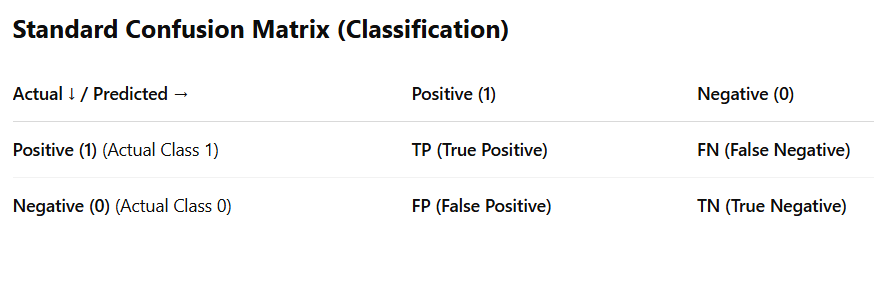

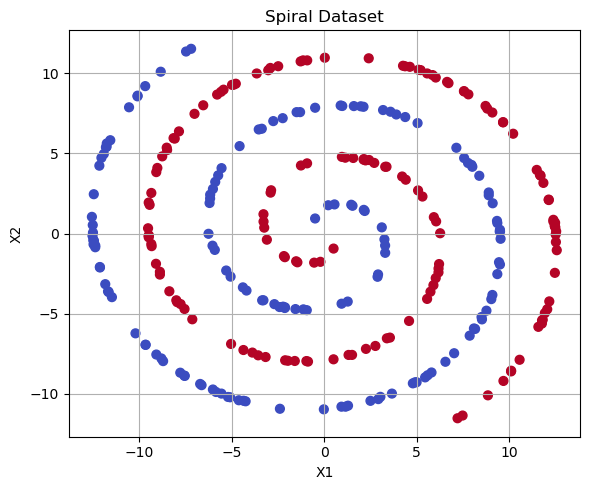

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from scipy.spatial.distance import cdist

# Create a spiral dataset
def make_spiral(n_points, noise=0.05):
    n = np.sqrt(np.random.rand(n_points, 1)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_points, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(n_points, 1) * noise
    X = np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y))))
    y = np.hstack((np.zeros(n_points), np.ones(n_points)))
    return X, y

X_spiral, y_spiral = make_spiral(150, noise=0.1)

# Plot spiral dataset
plt.figure(figsize=(6, 5))
plt.scatter(X_spiral[:, 0], X_spiral[:, 1], c=y_spiral, cmap="coolwarm", s=40)
plt.title("Spiral Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Users\jarif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


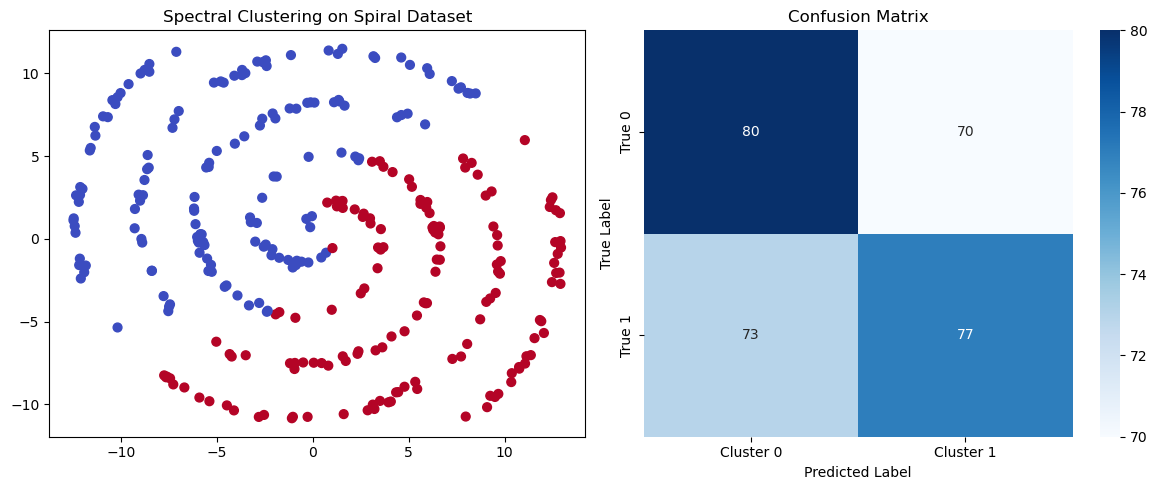

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.spatial.distance import cdist
import seaborn as sns

# Generate spiral dataset
def generate_spiral(n_points, noise=0.5):
    n = np.sqrt(np.random.rand(n_points, 1)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_points, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(n_points, 1) * noise
    X1 = np.hstack((d1x, d1y))

    d2x = np.cos(n) * n + np.random.rand(n_points, 1) * noise
    d2y = -np.sin(n) * n + np.random.rand(n_points, 1) * noise
    X2 = np.hstack((d2x, d2y))

    X = np.vstack((X1, X2))
    y = np.array([0] * n_points + [1] * n_points)
    return X, y

X_spiral, y_true_spiral = generate_spiral(150, noise=0.5)

# Step 1: Similarity matrix using RBF kernel
def rbf_kernel(X, sigma=1.0):
    pairwise_sq_dists = cdist(X, X, 'sqeuclidean')
    return np.exp(-pairwise_sq_dists / (2 * sigma ** 2))

A = rbf_kernel(X_spiral, sigma=1.5)

# Step 2: Laplacian
D = np.diag(A.sum(axis=1))
L = D - A

# Normalized Laplacian
D_inv_sqrt = np.diag(1.0 / np.sqrt(D.diagonal()))
L_norm = D_inv_sqrt @ L @ D_inv_sqrt

# Step 3: Eigenvectors
eigvals, eigvecs = np.linalg.eigh(L_norm)
Z = eigvecs[:, :2]

# Step 4: KMeans on eigenvectors
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_pred_spiral = kmeans.fit_predict(Z)

# Confusion matrix
conf_matrix_spiral = confusion_matrix(y_true_spiral, y_pred_spiral)

# Plot results
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Spectral clustering result
axs[0].scatter(X_spiral[:, 0], X_spiral[:, 1], c=y_pred_spiral, cmap='coolwarm', s=40)
axs[0].set_title("Spectral Clustering on Spiral Dataset")

# Confusion matrix
sns.heatmap(conf_matrix_spiral, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Cluster 0", "Cluster 1"],
            yticklabels=["True 0", "True 1"], ax=axs[1])
axs[1].set_title("Confusion Matrix")
axs[1].set_xlabel("Predicted Label")
axs[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()


### Sigmoid Function

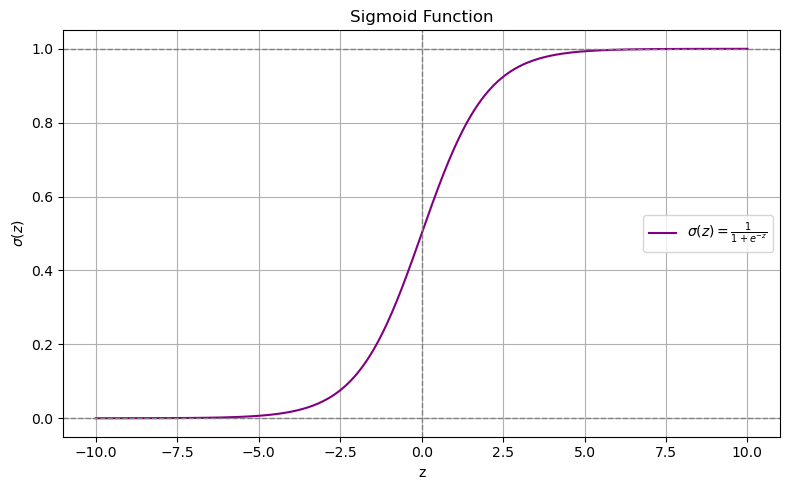

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values
z = np.linspace(-10, 10, 400)
sig = sigmoid(z)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(z, sig, label=r'$\sigma(z) = \frac{1}{1 + e^{-z}}$', color='purple')
plt.axhline(0, color='gray', lw=1, linestyle='--')
plt.axhline(1, color='gray', lw=1, linestyle='--')
plt.axvline(0, color='gray', lw=1, linestyle='--')
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel(r"$\sigma(z)$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### logistic Regeression

In [2]:
import numpy as np

def logistic_regression_newton(X, y, max_iter=100, eps=1e-6):
    """
    Logistic Regression using Newton-Raphson optimization.
    y must be in {-1, 1}
    """
    # Add bias term to feature matrix
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    beta = np.zeros(X.shape[1])

    for it in range(max_iter):
        Xb = X @ beta
        v = np.exp(-y * Xb)
        u = y * v / (1 + v)

        grad = -X.T @ u
        w_diag = v / (1 + v)**2
        W = np.diag(w_diag)
        H = X.T @ W @ X

        delta = np.linalg.solve(H, grad)
        beta -= delta

        if np.linalg.norm(delta) < eps:
            print(f'Converged in {it+1} iterations.')
            break

    return beta

def predict(X, beta):
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    return np.where(X @ beta >= 0, 1, -1)


### KLR

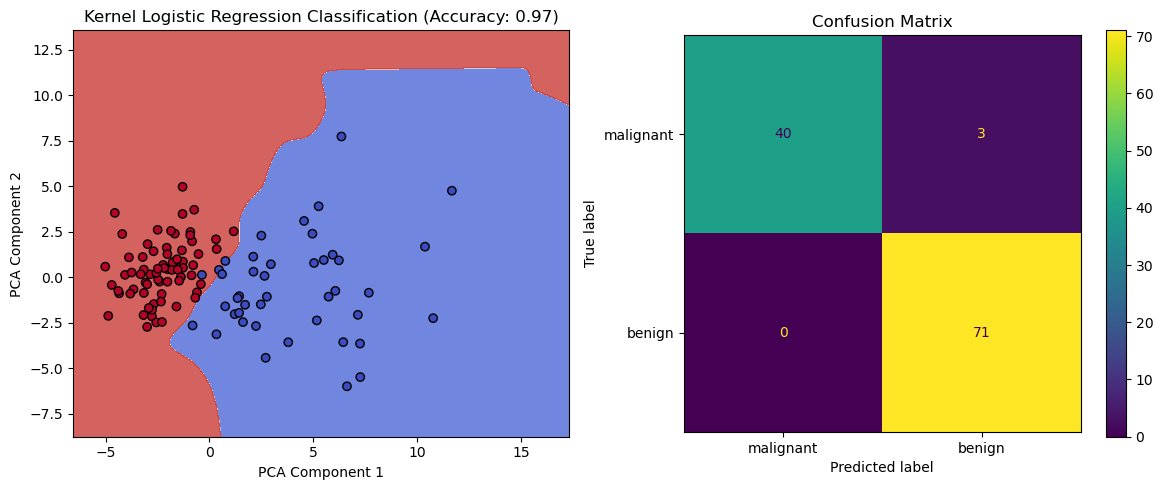

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from sklearn.decomposition import PCA

# Load and preprocess dataset
data = load_breast_cancer()
X, y = data.data, data.target
y = 2 * y - 1  # Convert to {-1, 1}

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# RBF Kernel function
def rbf_kernel(X1, X2, gamma=1.0):
    sq_dists = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return np.exp(-gamma * sq_dists)

# Kernel Logistic Regression (Dual formulation)
class KernelLogisticRegression:
    def __init__(self, gamma=1.0, lambda_=1e-3):
        self.gamma = gamma
        self.lambda_ = lambda_

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.K = rbf_kernel(X, X, self.gamma)

        def loss(alpha):
            z = self.K @ alpha
            log_exp = np.log(1 + np.exp(-y * z))
            reg = 0.5 * self.lambda_ * np.dot(alpha, self.K @ alpha)
            return np.mean(log_exp) + reg

        def grad(alpha):
            z = self.K @ alpha
            sigmoid = 1 / (1 + np.exp(y * z))
            grad = -(self.K @ (y * sigmoid)) / len(y) + self.lambda_ * self.K @ alpha
            return grad

        alpha_init = np.zeros(len(y))
        result = minimize(loss, alpha_init, jac=grad, method='L-BFGS-B')
        self.alpha = result.x

    def predict_proba(self, X):
        K_test = rbf_kernel(X, self.X_train, self.gamma)
        z = K_test @ self.alpha
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        return np.where(self.predict_proba(X) >= 0.5, 1, -1)

# Train Kernel Logistic Regression
klr = KernelLogisticRegression(gamma=0.5)
klr.fit(X_train, y_train)
y_pred = klr.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix((y_test + 1) // 2, (y_pred + 1) // 2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)

# Visualization of classification regions
h = .02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = klr.predict(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 5))

# Classification plot
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title(f'Kernel Logistic Regression Classification (Accuracy: {acc:.2f})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Confusion matrix
plt.subplot(1, 2, 2)
disp.plot(ax=plt.gca())
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()


Converged in 9 iterations.


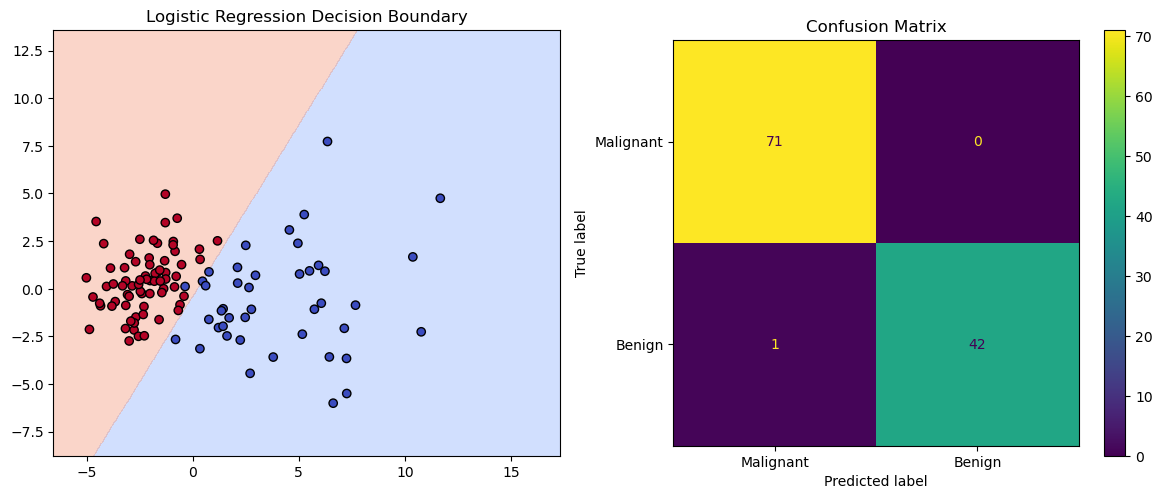

(0.9912280701754386,
 array([[71,  0],
        [ 1, 42]], dtype=int64))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load and preprocess dataset
data = load_breast_cancer()
X, y = data.data, data.target
y = 2 * y - 1  # Convert to {-1, 1}

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Add bias term
X_train_aug = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_aug = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

# Initialize beta
beta = np.zeros(X_train_aug.shape[1])

# Newton-Raphson method for logistic regression
max_iter = 20
eps = 1e-6

for it in range(max_iter):
    Xb = X_train_aug @ beta
    v = np.exp(-y_train * Xb)
    u = y_train * v / (1 + v)

    grad = -X_train_aug.T @ u
    w_diag = v / (1 + v)**2
    W = np.diag(w_diag)
    H = X_train_aug.T @ W @ X_train_aug

    delta = np.linalg.solve(H, grad)
    beta -= delta

    if np.linalg.norm(delta) < eps:
        print(f'Converged in {it+1} iterations.')
        break

# Predict on test data
Xb_test = X_test_aug @ beta
y_pred = np.where(Xb_test >= 0, 1, -1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, -1])

# Plot decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
grid_aug = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
Z = grid_aug @ beta
Z = Z.reshape(xx.shape)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Decision boundary
ax[0].contourf(xx, yy, Z >= 0, alpha=0.4, cmap=plt.cm.coolwarm)
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
ax[0].set_title("Logistic Regression Decision Boundary")

# Confusion matrix
ConfusionMatrixDisplay(cm, display_labels=["Malignant", "Benign"]).plot(ax=ax[1])
ax[1].set_title("Confusion Matrix")

plt.tight_layout()
plt.show()

accuracy


- ** On linear data lr is performing good 

# comparision of Logistic Regression and KLR on non linear data sets (two circle data sets)

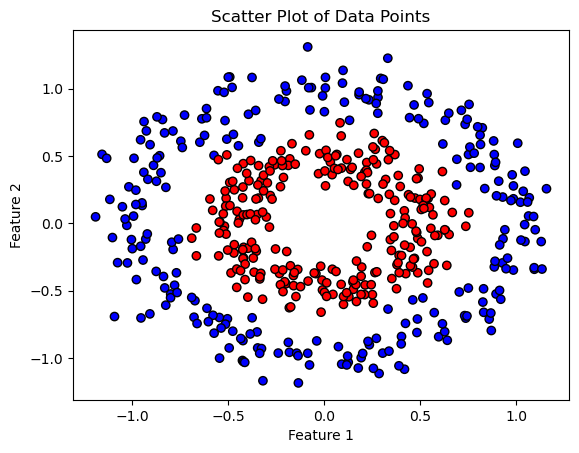

In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate data
X, y = make_circles(n_samples=500, factor=0.5, noise=0.1, random_state=42)

# Create scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("Scatter Plot of Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


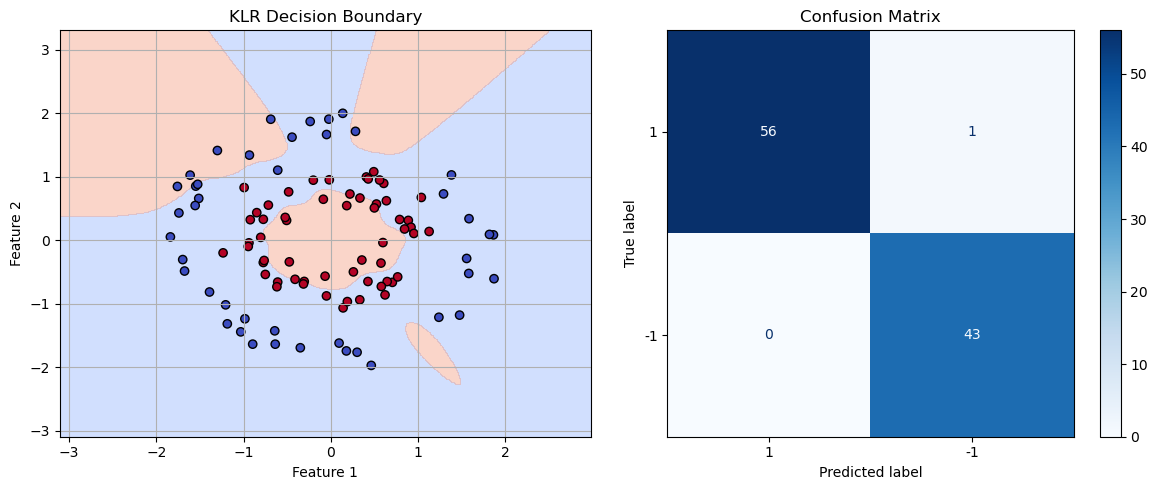

Accuracy: 0.99


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics.pairwise import rbf_kernel

# Step 1: Generate nonlinear data
X, y = make_circles(n_samples=500, factor=0.5, noise=0.1, random_state=42)
y = 2 * y - 1  # Convert labels to {-1, 1}

# Step 2: Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Define Kernel Logistic Regression using Newton's method
def kernel_logistic_regression(X_train, y_train, X_test, gamma=5.0, max_iter=100, eps=1e-5):
    K = rbf_kernel(X_train, X_train, gamma=gamma)
    alpha = np.zeros(len(y_train))
    
    for _ in range(max_iter):
        f = K @ alpha
        v = np.exp(-y_train * f)
        u = y_train * v / (1 + v)
        W = np.diag(v / (1 + v)**2)
        grad = -K @ u
        H = K @ W @ K + 1e-6 * np.eye(len(K))  # Regularization for numerical stability
        delta = np.linalg.solve(H, grad)
        alpha -= delta
        if np.linalg.norm(delta) < eps:
            break
    
    # Predict on test data
    K_test = rbf_kernel(X_test, X_train, gamma=gamma)
    f_test = K_test @ alpha
    y_pred = np.where(f_test >= 0, 1, -1)
    
    return y_pred, alpha

# Step 4: Apply KLR
y_pred_klr, alpha = kernel_logistic_regression(X_train_scaled, y_train, X_test_scaled)

# Step 5: Evaluate the model
acc = accuracy_score(y_test, y_pred_klr)
cm = confusion_matrix(y_test, y_pred_klr, labels=[1, -1])

# Step 6: Visualization
def plot_decision_boundary_and_confusion_matrix(X_train, X_test, y_train, y_test, alpha, gamma, cm):
    # Create a mesh grid for plotting
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    K_grid = rbf_kernel(grid_scaled, X_train_scaled, gamma=gamma)
    Z = K_grid @ alpha
    Z = Z.reshape(xx.shape)

    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Plot decision boundary
    ax[0].contourf(xx, yy, Z > 0, alpha=0.4, cmap=plt.cm.coolwarm)
    ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
    ax[0].set_title("KLR Decision Boundary")
    ax[0].set_xlabel("Feature 1")
    ax[0].set_ylabel("Feature 2")
    ax[0].grid(True)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, -1])
    disp.plot(ax=ax[1], cmap=plt.cm.Blues)
    ax[1].set_title("Confusion Matrix")

    plt.tight_layout()
    plt.show()

# Call the visualization function
plot_decision_boundary_and_confusion_matrix(X_train_scaled, X_test_scaled, y_train, y_test, alpha, gamma=5.0, cm=cm)

# Print accuracy
print(f"Accuracy: {acc:.2f}")


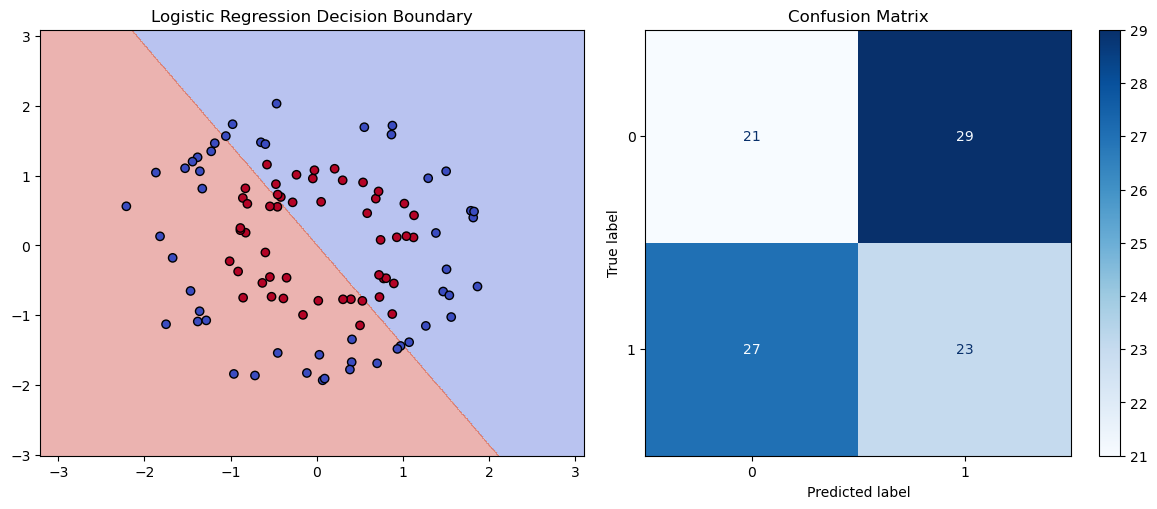

The accuracy for Logistic regression is 0.44


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate synthetic dataset
X, y = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=0)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_test = lr_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
acc = accuracy_score(y_test, y_pred_test)
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500),
                     np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = lr_model.predict(grid)
Z = Z.reshape(xx.shape)

ax[0].contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
ax[0].set_title("Logistic Regression Decision Boundary")

# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax[1], cmap=plt.cm.Blues)
ax[1].set_title("Confusion Matrix")

plt.tight_layout()
plt.show()
print(f"The accuracy for Logistic regression is {acc}")

- ## on this two circle data s you can see simple logistic regression is performing very poor while Kernel logistic regresssion is performing very good